In [176]:
# preparation
import tensorflow as tf
from tensorflow import keras 
# Common imports
import numpy as np
import pandas as pd
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [177]:
stockdata = pd.read_csv('KO.csv')
stockdata

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,22.700001,23.000000,22.520000,22.950001,14.492252,16355800
1,2009-01-05,22.785000,22.945000,22.590000,22.719999,14.347014,20237200
2,2009-01-06,22.850000,22.985001,22.230000,22.355000,14.116528,21307800
3,2009-01-07,22.110001,22.590000,22.110001,22.465000,14.185989,21581000
4,2009-01-08,22.420000,22.639999,22.280001,22.620001,14.283875,20087000
...,...,...,...,...,...,...,...
2763,2019-12-24,54.799999,55.000000,54.639999,54.709999,54.234360,3359300
2764,2019-12-26,54.919998,55.020000,54.790001,55.020000,54.541668,6228500
2765,2019-12-27,55.009998,55.450001,55.000000,55.349998,54.868797,6895500
2766,2019-12-30,55.180000,55.389999,55.060001,55.270000,54.789494,6431700


In [178]:
T = stockdata.iloc[:, 4:5].copy()
X = stockdata.iloc[:,0:4].copy()
X = pd.concat([X,stockdata.iloc[:,5:].copy()],axis=1)

X["Date"] = pd.to_datetime(X["Date"]).dt.strftime("%Y%m%d").astype(int)
X.dtypes

Date           int32
Open         float64
High         float64
Low          float64
Adj Close    float64
Volume         int64
dtype: object

In [179]:
X

,Date,Open,High,Low,Adj Close,Volume
0,20090102,22.700001,23.000000,22.520000,14.492252,16355800
1,20090105,22.785000,22.945000,22.590000,14.347014,20237200
2,20090106,22.850000,22.985001,22.230000,14.116528,21307800
3,20090107,22.110001,22.590000,22.110001,14.185989,21581000
4,20090108,22.420000,22.639999,22.280001,14.283875,20087000
...,...,...,...,...,...,...
2763,20191224,54.799999,55.000000,54.639999,54.234360,3359300
2764,20191226,54.919998,55.020000,54.790001,54.541668,6228500
2765,20191227,55.009998,55.450001,55.000000,54.868797,6895500
2766,20191230,55.180000,55.389999,55.060001,54.789494,6431700


In [151]:
D = pd.concat([X, T], axis=1)

In [152]:
#def temp_scatter(D):
    #fig, axes = plt.subplots(3,2)
    #fig.set_figheight(12)
   # fig.set_figwidth(16)
   # for i,c  in enumerate(X.columns.values):
  #      D.plot.scatter('Close',c , ax=axes[int(i/2), i%5])
 #   fig.tight_layout()
    
#temp_scatter(D)

array([[2.0090102e+07, 2.2700001e+01, 2.3000000e+01, 2.2520000e+01,
        1.6355800e+07],
       [2.0090105e+07, 2.2785000e+01, 2.2945000e+01, 2.2590000e+01,
        2.0237200e+07],
       [2.0090106e+07, 2.2850000e+01, 2.2985001e+01, 2.2230000e+01,
        2.1307800e+07],
       ...,
       [2.0191227e+07, 5.5009998e+01, 5.5450001e+01, 5.5000000e+01,
        6.8955000e+06],
       [2.0191230e+07, 5.5180000e+01, 5.5389999e+01, 5.5060001e+01,
        6.4317000e+06],
       [2.0191231e+07, 5.5200001e+01, 5.5380001e+01, 5.4980000e+01,
        7.9826000e+06]])

Text(0.5, 0, 'Close')

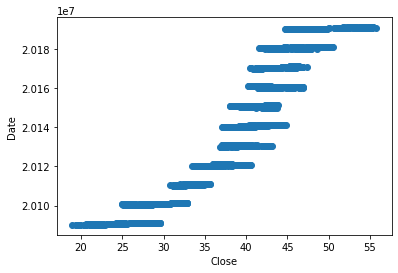

In [153]:


plt.scatter(T,X.iloc[:,0:1])
plt.ylabel("Date")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

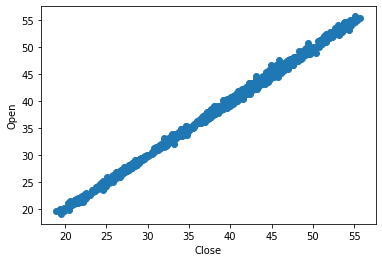

In [154]:
plt.scatter(T,X.iloc[:,1:2])
plt.ylabel("Open")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

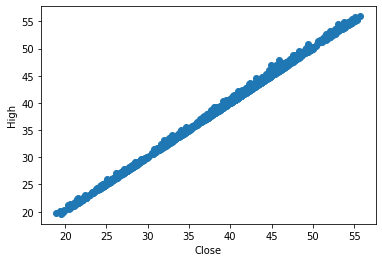

In [155]:
plt.scatter(T,X.iloc[:,2:3])
plt.ylabel("High")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

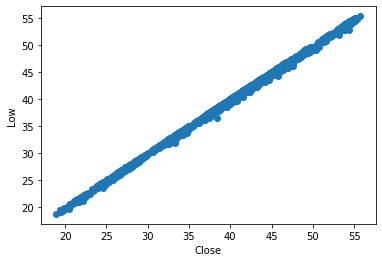

In [156]:
plt.scatter(T,X.iloc[:,3:4])
plt.ylabel("Low")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

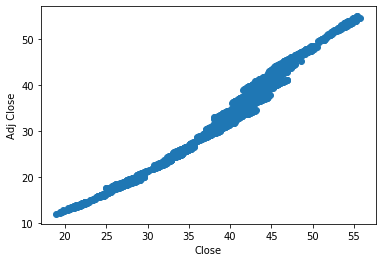

In [157]:
plt.scatter(T,X.iloc[:,4:5])
plt.ylabel("Adj Close")
plt.xlabel("Close")

Text(0.5, 0, 'Close')

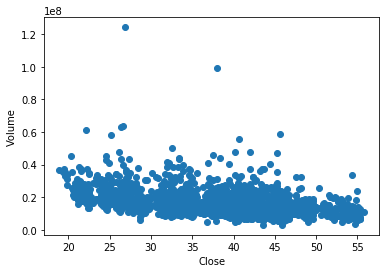

In [158]:
plt.scatter(T,X.iloc[:,5:6])
plt.ylabel("Volume")
plt.xlabel("Close")

Text(0.5, 0, 'Date')

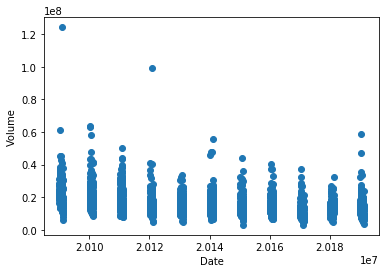

In [159]:
plt.scatter(X.iloc[:,0:1],X.iloc[:,5:6])
plt.ylabel("Volume")
plt.xlabel("Date")

In [160]:
X = X.drop(["Adj Close"],axis=1)

In [161]:
T = T.values

In [162]:
T

array([[22.950001],
       [22.719999],
       [22.355   ],
       ...,
       [55.349998],
       [55.27    ],
       [55.349998]])

In [163]:
X = X.values

In [164]:
def standardize(X, mean, std):
    return (X-mean) / std

In [165]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

XS = standardize(X, mean, std)

In [166]:
import partitionlib as ptl

In [167]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(copy(X), copy(T))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    
    return Xtrain, Xtest, Ttrain, Ttest

Xtrain, Xtest, Ttrain, Ttest = partition_data(XS, T)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (2214, 5)
Train target shape: (2214, 1)
Test data shape: (554, 5)
Test target shape: (554, 1)


In [168]:
model = keras.Sequential([
    keras.layers.Dense(10),
    keras.layers.Dense(10),
    keras.layers.Dense(10),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

In [169]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=0.001))

In [170]:
history = model.fit(Xtrain, Ttrain, epochs=30)

Train on 2214 samples
Epoch 1/30
2214/2214 [==============================] - 0s 107us/sample - loss: 295.3508
Epoch 2/30
2214/2214 [==============================] - 0s 31us/sample - loss: 5.6235
Epoch 3/30
2214/2214 [==============================] - 0s 29us/sample - loss: 0.8274
Epoch 4/30
2214/2214 [==============================] - 0s 29us/sample - loss: 0.1973
Epoch 5/30
2214/2214 [==============================] - 0s 32us/sample - loss: 0.1025
Epoch 6/30
2214/2214 [==============================] - 0s 29us/sample - loss: 0.0924
Epoch 7/30
2214/2214 [==============================] - 0s 29us/sample - loss: 0.0740
Epoch 8/30
2214/2214 [==============================] - 0s 30us/sample - loss: 0.1588
Epoch 9/30
2214/2214 [==============================] - 0s 28us/sample - loss: 0.0684
Epoch 10/30
2214/2214 [==============================] - 0s 32us/sample - loss: 0.2342
Epoch 11/30
2214/2214 [==============================] - 0s 25us/sample - loss: 0.3526
Epoch 12/30
2214/2214 [====

In [171]:
error = model.evaluate(Xtest, Ttest)
error

554/554 [==============================] - 0s 90us/sample - loss: 0.3181


0.31814810181782993

In [172]:
y = model.predict(Xtest)
y

array([[40.010162],
       [44.501877],
       [44.09568 ],
       [23.919619],
       [41.651844],
       [36.488728],
       [41.570972],
       [20.458525],
       [26.717922],
       [34.84141 ],
       [54.265614],
       [42.36938 ],
       [45.13458 ],
       [24.696041],
       [43.339138],
       [29.952671],
       [33.17268 ],
       [38.45112 ],
       [46.735744],
       [48.929157],
       [44.30675 ],
       [40.438564],
       [45.098145],
       [24.600035],
       [39.18082 ],
       [41.42922 ],
       [39.08183 ],
       [48.41494 ],
       [45.505795],
       [34.213478],
       [39.872356],
       [43.183315],
       [38.127228],
       [45.448   ],
       [33.779728],
       [44.64478 ],
       [26.552423],
       [31.449469],
       [26.22134 ],
       [24.56399 ],
       [42.81709 ],
       [39.713253],
       [44.741867],
       [48.63096 ],
       [53.15996 ],
       [40.29265 ],
       [27.403036],
       [44.211243],
       [37.690014],
       [48.666477],


In [173]:
y.shape

(554, 1)

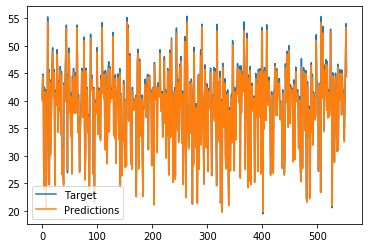

In [174]:
plt.plot(Ttest, label = 'Target')
plt.plot(y, label = 'Predictions')
plt.legend()